In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## why isn't the opendrift not much faster in the ROMS case?

In [ ]:
# roms
required_variables = {'x_sea_water_velocity': {'fallback': 0}, 'y_sea_water_velocity': {'fallback': 0}, 'upward_sea_water_velocity': {'fallback': 0}, 'x_wind': {'fallback': 0}, 'y_wind': {'fallback': 0}, 'sea_surface_wave_stokes_drift_x_velocity': {'fallback': 0}, 'sea_surface_wave_stokes_drift_y_velocity': {'fallback': 0}, 'sea_surface_wave_period_at_variance_spectral_density_maximum': {'fallback': 0}, 'sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment': {'fallback': 0}, 'land_binary_mask': {'fallback': None}, 'ocean_vertical_diffusivity': {'fallback': 0.02}, 'ocean_mixed_layer_thickness': {'fallback': 50}, 'sea_floor_depth_below_sea_level': {'fallback': 0}}

In [ ]:
import pickle
with open(r'C:\Users\laurins\Documents\data\output\od_roms.pkl', 'wb') as f:
    pickle.dump(o, f)

## v06 (full_dataset_test_v02)
fixed the "data time step size"-bug (OD is based on time step size while OT is based on data time step fractions)

In [90]:
path = r'C:\Users\laurins\Documents\data\output\full_dataset_test_v02\full_dataset_test_v02.txt'

df = pd.read_csv(path, sep=',', names=['model','data set','#particles','time'],comment='#')
df['time'].sum()/3600

4.273381268055556

rom
schism_small
schism_large
rom
schism_small
schism_large


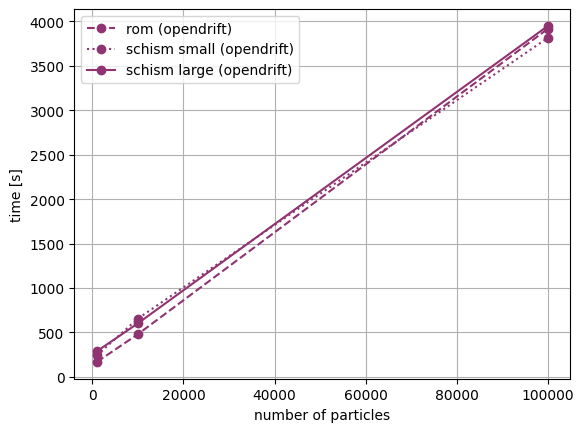

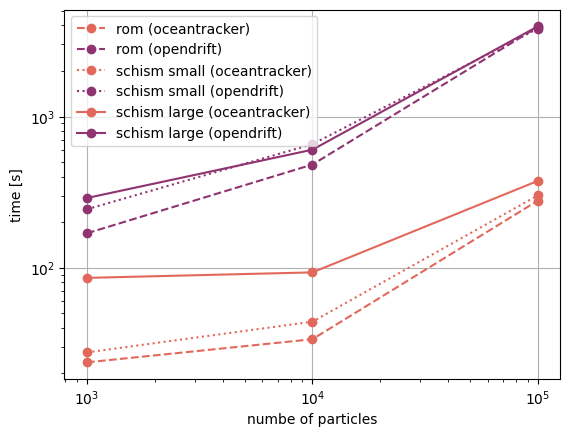

In [111]:
plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')
    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)')
    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)')

plt.legend()
plt.xlabel('number of particles')
plt.ylabel('time [s]')
plt.grid(True)

plt.figure()
colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')
    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)')
    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)')

plt.legend()
plt.xlabel('numbe of particles')
plt.ylabel('time [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

In [107]:
timing_data = {
    'schism_large': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'schism_small': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'rom': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )    
    }
}
def print_dict_as_json(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            print_dict_as_json(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))

print(f'time per particle (excluding set-up times) in different data sets')
print('----------------------------------------------------------------------')
print('Data set\t | time per particle [ms]\t')
print('---------------------------------------')
for item in timing_data:
    print(f"{item.ljust(15)}\t | {timing_data[item]['oceantracker'][1]*1e3:> 2.8f}")
    print(f"{item.ljust(15)}\t | {timing_data[item]['opendrift'][1]*1e3:>2.8f}")
    

print(f'\nspeed-up per particle (excluding set-up times) in different data sets')
print('----------------------------------------------------------------------')
print('Data set\t | Speed up\t')
print('---------------------------------------')
for item in timing_data:
    print(f"{item.ljust(15)}\t | {timing_data[item]['opendrift'][1]/timing_data[item]['oceantracker'][1]}")

time per particle (excluding set-up times) in different data sets
----------------------------------------------------------------------
Data set	 | time per particle [ms]	
---------------------------------------
schism_large   	 |  3.01232475
schism_large   	 | 37.04096588
schism_small   	 |  2.80051273
schism_small   	 | 35.66853046
rom            	 |  2.62756634
rom            	 | 37.97882372

speed-up per particle (excluding set-up times) in different data sets
----------------------------------------------------------------------
Data set	 | Speed up	
---------------------------------------
schism_large   	 | 12.296471650047515
schism_small   	 | 12.736428626286147
rom            	 | 14.453992316657367


## What is actually in those roms files?

In [85]:
df = Dataset(r'C:\Users\laurins\Documents\data\input\rom\doppio_his_20171101_0000_0002.nc')
print(df.variables['ocean_time'])
df.close

<class 'netCDF4._netCDF4.Variable'>
float64 ocean_time(ocean_time)
    long_name: time since initialization
    units: seconds since 2006-01-01 00:00:00
    calendar: gregorian
    field: time, scalar, series
unlimited dimensions: ocean_time
current shape = (24,)
filling on, default _FillValue of 9.969209968386869e+36 used


<function Dataset.close>

## What is the data time step size?

In [74]:
from netCDF4 import Dataset
df = Dataset(r'C:\Users\laurins\Documents\data\input\schism_large\schism_marl20170101_00z_3D.nc')
print(f"schism large:\t{(df.variables['time'][1] - df.variables['time'][0])}")
df.close()

df = Dataset(r'C:\Users\laurins\Documents\data\input\schism_small\NZfinite20170101_01z.nc')
print(f"schism small:\t{(df.variables['time'][1] - df.variables['time'][0])}")
df.close()

df = Dataset(r'C:\Users\laurins\Documents\data\input\rom\doppio_his_20171101_0000_0001.nc')
print(f"roms:\t\t{df.variables['ocean_time'][1]-df.variables['ocean_time'][0]}")
df.close()

df = Dataset(r'C:\Users\laurins\Documents\data\output\full_dataset_test_v01\full_dataset_test_v01_rom_1000_od\tracks.nc')
print(f"\nod output time range:\t{(df.variables['time'][1] - df.variables['time'][0])/3600}??")
df.close()


schism large:	1800.0
schism small:	3600.0
roms:		3600.0

od output time range:	48.0??


## v05 (full_dataset_test_v01)
v04 surprised me as OpenDrifts ROMS performance was much worse then I expected.
I checked the code for configuration issues but couldn't find any.
I reran v04 with much larger time steps and pickled the timing data from OpdenDrift to figure out where its spending all its time


In [77]:
path = r'C:\Users\laurins\Documents\data\output\full_dataset_test_v01\full_dataset_test_v01.txt'

df = pd.read_csv(path, sep=',', header=None)
df.columns = ['model','data set','#particles','time']

df['time'].sum()/3600

8.408390175833334

rom
schism_small
schism_large


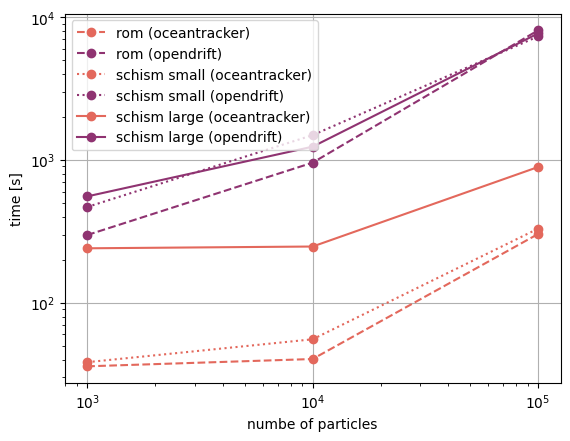

In [8]:
df = pd.read_csv(path, sep=',', header=None)
df.columns = ['model','data set','#particles','time']

colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')
    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)')
    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)')

plt.legend()
plt.xlabel('numbe of particles')
plt.ylabel('time [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

In [38]:
timing_data = {
    'schism_large': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'schism_small': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'rom': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )    
    }
}
def print_dict_as_json(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            print_dict_as_json(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))

print()
print(f'speed-up per particle (excluding set-up times) in different data sets')
print('----------------------------------------------------------------------')
print('Data set\t | Speed up\t')
print('---------------------------------------')
for item in timing_data:
    print(f"{item.ljust(15)}\t | {timing_data[item]['opendrift'][1]/timing_data[item]['oceantracker'][1]}")


speed-up per particle (excluding set-up times) in different data sets
----------------------------------------------------------------------
Data set	 | Speed up	
---------------------------------------
schism_large   	 | 10.55226736777182
schism_small   	 | 22.574631940507427
rom            	 | 28.300684594156643


In [34]:
import json
import pickle

path = {'ot': r'C:\Users\laurins\Documents\data\output\full_dataset_test_v01\full_dataset_test_v01_rom_100000_ot\full_dataset_test_v01_rom_100000_ot_caseInfo.json',
        'od': r'C:\Users\laurins\Documents\data\output\full_dataset_test_v01\full_dataset_test_v01_rom_100000_od\full_dataset_test_v01_rom_100000_od.pkl'}

with open(path['ot']) as f:
    ot_timing_data = json.load(f)['timers']

with open(path['od'], 'rb') as f:
    od_timing_data = pickle.load(f)

[print(f'{item}:\t{od_timing_data[item]}') for item in od_timing_data]
print(f"od roms reader: {od_timing_data['main loop:readers:roms native']}")
print(f"od roms steppr: {od_timing_data['main loop:updating elements']}")
print(f"od roms stepper/reader: {od_timing_data['main loop:updating elements']/od_timing_data['main loop:readers:roms native']}")



ot_timing_data

total time:	2:14:37.417733
configuration:	0:00:00.794427
preparing main loop:	0:00:04.598013
preparing main loop:making dynamical landmask:	0:00:00
preparing main loop:moving elements to ocean:	0:00:00.989752
main loop:readers:	1:37:31.613128
main loop:readers:global_landmask:	0:00:34.210980
main loop:readers:postprocessing:	0:02:23.235427
main loop:	2:14:27.263114
main loop:readers:roms native:	1:32:25.208760
main loop:updating elements:	1:45:15.650212
main loop:updating elements:vertical mixing:	0:26:59.572620
cleaning up:	0:00:04.762179
od roms reader: 1:32:25.208760
od roms steppr: 1:45:15.650212
od roms stepper/reader: 1.1389382231301244


['  378.85s  95% calls 00003: total_model_all,  (first call/remainder = 35.84s/343.01s',
 '  243.60s  61% calls 25386: setup_interp_time_step,  (first call/remainder =  4.36s/239.24s',
 '  242.62s  61% calls 04230: integration_step,  (first call/remainder =  0.58s/242.03s',
 '  150.97s  38% calls 25386: find_depth_cell,  (first call/remainder =  2.80s/148.17s',
 '   90.92s  23% calls 25386: find_cells_and_weights,  (first call/remainder =  1.38s/89.54s',
 '   80.02s  20% calls 04233: pre_step_bookkeeping,  (first call/remainder = 11.96s/68.06s',
 '   57.14s  14% calls 50784: interp_named_field_at_particle_locations,  (first call/remainder =  0.56s/56.57s',
 '   43.67s  11% calls 00003: reading_to_fill_time_buffer,  (first call/remainder = 17.21s/26.46s',
 '   19.30s   5% calls 08466: update_part_prop,  (first call/remainder =  1.51s/17.79s',
 '   12.11s   3% calls 04233: release_particles,  (first call/remainder = 10.57s/ 1.54s',
 '    0.71s   0% calls 00003: intialize_interplolation_g

* OpenDrift
  * "steppr"
    ```
    self.advect_ocean_current()
    self.vertical_advection()
    self.advect_wind()  # Wind shear in upper 10cm of ocean
    self.stokes_drift() 
    self.vertical_mixing()  # Including buoyancy and settling
    self.resuspension()
    ```
  * "reader"
    I cant find the exact timing information. I think its the full time spend in the roms reader. so finding cell. interpolation and all of that
* Oceantracker
  * steppr
    * advection and mixing \wo resusp 
  * reader
    


In [54]:
from netCDF4 import Dataset
## Data sets complexity
df = Dataset(r'C:\Users\laurins\Documents\data\input\schism_large\schism_marl20170101_00z_3D.nc')
n_schism_large =df.variables['SCHISM_hgrid_node_x'].shape[0]
print(f"SCHISM LARGE:\t number of nodes: {n_schism_large}")
df.close()

df = Dataset(r'C:\Users\laurins\Documents\data\input\schism_small\NZfinite20170101_01z.nc')
n_schism_small = df.variables['SCHISM_hgrid_node_x'].shape[0]
print(f"SCHISM small:\t number of nodes: {n_schism_small}")
df.close()

df = Dataset(r'C:\Users\laurins\Documents\data\input\rom\doppio_his_20171101_0000_0001.nc')
df.variables['lon_psi'].shape
n_roms = df.variables['lon_psi'].shape[0]*df.variables['lon_psi'].shape[1]
print(f"ROMS:\t\t number of nodes: {n_roms}")
df.close()

print('\nRatio of nodes')
print('--------------')
print("schism large\t: schism small\t: roms")
print(f"{n_schism_large/n_roms:.2f}\t\t: {n_schism_small/n_roms:.2f}\t\t: {n_roms/n_roms:.2f}")


SCHISM LARGE:	 number of nodes: 149233
SCHISM small:	 number of nodes: 78397
ROMS:		 number of nodes: 25305

Ratio of nodes
--------------
schism large	: schism small	: roms
5.90		: 3.10		: 1.00


## v04
* three datasets (schism small, schism large, roms)
* 2 days
* 1m time steps 
* \wo output


In [79]:
path = r'C:\Users\laurins\Documents\data\output\full_dataset_test_v00\full_dataset_test_v00.txt'

df = pd.read_csv(path, sep=',', header=None)
df.columns = ['model','data set','#particles','time']

df['time'].sum()/3600

9.001028615

schism_small
schism_large
rom


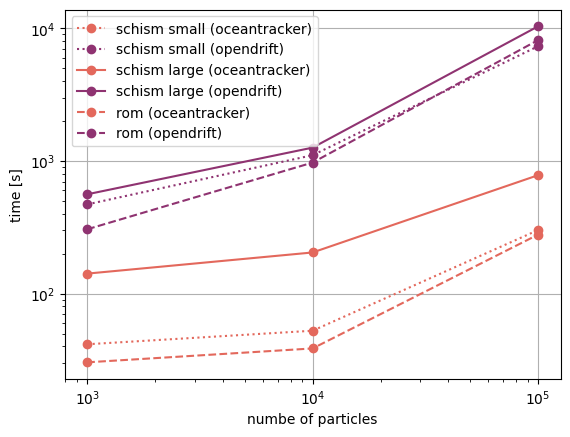

In [3]:
path = r'C:\Users\laurins\Documents\data\output\full_dataset_test_v00\full_dataset_test_v00.txt'

df = pd.read_csv(path, sep=',', header=None)
df.columns = ['model','data set','#particles','time']

colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')
    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)')
    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)')

plt.legend()
plt.xlabel('numbe of particles')
plt.ylabel('time [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

In [26]:
timing_data = {
    'schism_large': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'schism_small': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'rom': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )    
    }
}
def print_dict_as_json(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            print_dict_as_json(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))
print_dict_as_json(timing_data)

print()
print(f'speed-up per particle (excluding set-up times) in different data sets')
print('----------------------------------------------------------------------')
print('Data set\t | Speed up\t')
print('---------------------------------------')
for item in timing_data:
    print(f"{item.ljust(15)}\t | {timing_data[item]['opendrift'][1]/timing_data[item]['oceantracker'][1]}")

schism_large
	oceantracker
		[1.37351397e+02 6.44412357e-03]
	opendrift
		[3.66491861e+02 9.98950432e-02]
schism_small
	oceantracker
		[3.25487798e+01 2.68320803e-03]
	opendrift
		[4.07295092e+02 6.92554177e-02]
rom
	oceantracker
		[2.06679451e+01 2.57205501e-03]
	opendrift
		[2.03147729e+02 7.95212750e-02]

speed-up per particle (excluding set-up times) in different data sets
----------------------------------------------------------------------
Data set	 | Speed up	
---------------------------------------
schism_large   	 | 15.50172682258241
schism_small   	 | 25.810677695072638
rom            	 | 30.917408363307672


## v03
* od was not using the smaller step size - fixed that
* (classic confirmation bias situation btw)


In [7]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v03.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

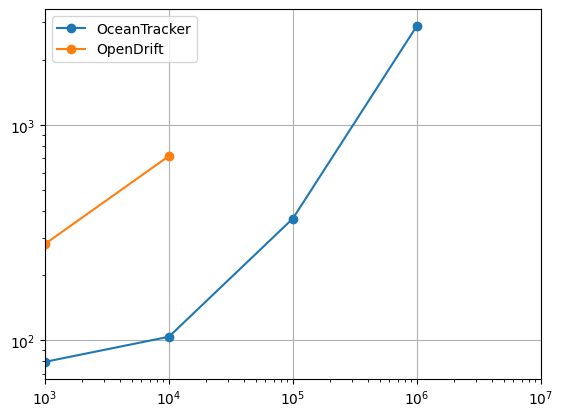

In [33]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e3,1e7)
plt.legend()

In [14]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

79.75468787690359 0.0028001145008932373
231.26229911111125 0.04851583088888887
speedup ot: 17.326373929856192


## v02 - buggy
* disables output writing in OT
* reused the OD points from v01


In [16]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v02.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

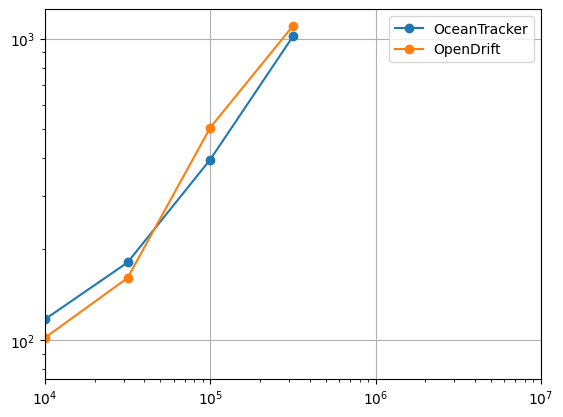

In [17]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e7)
plt.legend()

In [18]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

87.40747294234151 0.0029498262776123324
87.40835403468479 0.0032843996675228334
speedup ot: 1.1134213877100971


## v01 - buggy 
* more release points
* 1min time steps
* ~~no output writing~~ I misconfigured OT and it still wrote the tracks
* integration scheme changed to rk4


In [13]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v01.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

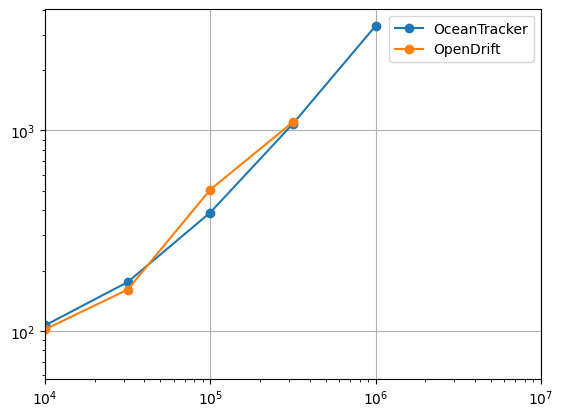

In [14]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e7)
plt.legend()

In [15]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

66.5367369193496 0.003251868681948735
87.40835403468479 0.0032843996675228334
speedup ot: 1.010003782057584


## v00 - initial 

In [11]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v00.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

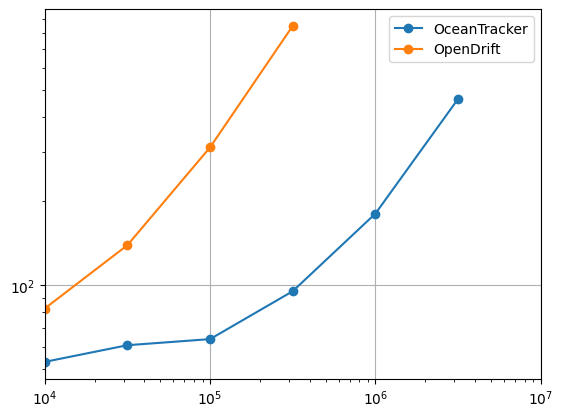

In [12]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e7)
plt.legend()

In [32]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

59.67797034330147 0.00012698916957450088
65.73324578927514 0.002469448901137713
speedup ot: 19.446137882561384
